<a href="https://colab.research.google.com/github/Notmrcomedy/Fincomp/blob/main/Taller1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taller 1**

**Estudiantes:**
Ana María Duarte Gamba - Juan José Morales Leguizamón

***PUNTO 1***

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
!pip install --quiet yfinance 
import yfinance as yf
import pandas_datareader.data as pdr

In [ ]:
yf.pdr_override()
acciones = ["AAPL","AMZN"]
precios = pdr.get_data_yahoo(acciones,start="2021-01-01",end="2022-12-31")["Adj Close"]


[*********************100%***********************]  2 of 2 completed


In [ ]:
retornos_diarios = np.log(precios/precios.shift(1)).dropna()
retornos_diarios

,AAPL,AMZN
Date,,
2021-01-05,0.012288,0.009955
2021-01-06,-0.034241,-0.025212
2021-01-07,0.033554,0.007549
2021-01-08,0.008594,0.006475
2021-01-11,-0.023524,-0.021754
...,...,...
2022-12-23,-0.002802,0.017274
2022-12-27,-0.013976,-0.026266
2022-12-28,-0.031166,-0.014801


In [ ]:
retornos_mensuales  = retornos_diarios*30
retornos_mensuales

,AAPL,AMZN
Date,,
2021-01-05,0.368633,0.298639
2021-01-06,-1.027234,-0.756353
2021-01-07,1.006619,0.226457
2021-01-08,0.257830,0.194235
2021-01-11,-0.705708,-0.652631
...,...,...
2022-12-23,-0.084061,0.518233
2022-12-27,-0.419267,-0.787971
2022-12-28,-0.934976,-0.444022


In [ ]:
retornos_anuales  = retornos_diarios*252
retornos_anuales

,AAPL,AMZN
Date,,
2021-01-05,3.096520,2.508571
2021-01-06,-8.628766,-6.353368
2021-01-07,8.455601,1.902239
2021-01-08,2.165775,1.631576
2021-01-11,-5.927946,-5.482104
...,...,...
2022-12-23,-0.706113,4.353158
2022-12-27,-3.521840,-6.618953
2022-12-28,-7.853801,-3.729782


In [ ]:
retornos_esperados = retornos_diarios.mean()*252
retornos_esperados

AAPL    0.008003
AMZN   -0.321360
dtype: float64

In [ ]:
volatilidad = retornos_diarios.std()*np.sqrt(252)
volatilidad

AAPL    0.308152
AMZN    0.393604
dtype: float64

In [ ]:
y = precios.mean(),precios.median(),precios.std(),precios.kurt(),precios.skew()
Filas = ["Media","Mediana","Desviación estandar","Kurtosis","Simetría"]

pd.DataFrame(y,index=Filas)

,AAPL,AMZN
Media,146.852668,146.686933
Mediana,146.369370,157.784500
Desviación estandar,15.606157,27.195884
Kurtosis,-0.814145,-0.658593
Simetría,0.166942,-0.763379


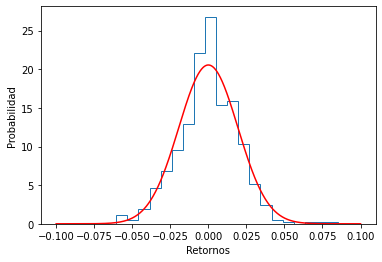

In [ ]:
from scipy.stats import norm
x = np.linspace(-0.1,0.1,num=1000)
plt.hist(retornos_diarios["AAPL"],density=True,histtype="step",bins=20);
#plt.hist(retornos["NVDA"],density=True,histtype="step",bins=20);
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")
plt.plot(x,norm.pdf(x,scale=retornos_diarios["AAPL"].std()),"r")
plt.show();

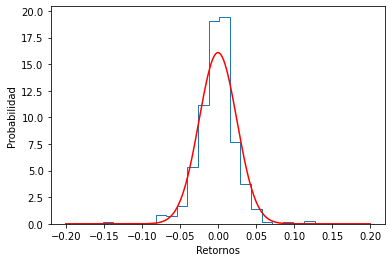

In [ ]:
from scipy.stats import norm
x = np.linspace(-0.2,0.2,num=1000)
plt.hist(retornos_diarios["AMZN"],density=True,histtype="step",bins=20);
#plt.hist(retornos["NVDA"],density=True,histtype="step",bins=20);
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")
plt.plot(x,norm.pdf(x,scale=retornos_diarios["AMZN"].std()),"r")
plt.show();

In [ ]:
retornos_diarios.corr(method="pearson")

,AAPL,AMZN
AAPL,1.000000,0.663845
AMZN,0.663845,1.000000


In [ ]:
retornos_diarios.corr(method="kendall")

,AAPL,AMZN
AAPL,1.000000,0.527034
AMZN,0.527034,1.000000


In [ ]:
retornos_diarios.corr(method="spearman")

,AAPL,AMZN
AAPL,1.00000,0.70558
AMZN,0.70558,1.00000


***Punto 2***

In [ ]:
yf.pdr_override()
acciones = ["TSLA", "INTC","VZ","CVX","NVDA","IBM","JNJ","DIS","MSFT","META"]
precios = pdr.get_data_yahoo(acciones,start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
ret = precios.pct_change().dropna()

[*********************100%***********************]  10 of 10 completed


In [ ]:
ret_anual=((1+ret)**12)-1 
pd.DataFrame(ret_anual)

,CVX,DIS,IBM,INTC,JNJ,META,MSFT,NVDA,TSLA,VZ
Date,,,,,,,,,,
2018-01-01,0.015446,0.252236,1.177710,0.655323,-0.123772,0.991945,2.525334,16.652704,3.716443,0.291377
2018-02-01,-0.743315,-0.464426,-0.446358,0.327497,-0.524897,-0.430665,-0.145848,-0.170528,-0.321046,-0.742879
2018-03-01,0.410644,-0.274321,-0.066376,1.099822,-0.080864,-0.731963,-0.235122,-0.405584,-0.952501,0.020296
2018-04-01,2.039611,-0.013064,-0.494111,-0.100991,-0.144831,1.419616,0.339422,-0.296545,2.290551,0.459249
2018-05-01,-0.074986,-0.098147,-0.263631,1.235905,-0.488353,2.692312,0.942401,2.952396,-0.316397,-0.233237
2018-06-01,0.360805,0.872953,-0.005016,-0.695177,0.296915,0.171037,0.024235,-0.524371,8.323323,0.909464
2018-07-01,-0.015082,1.617410,0.554324,-0.326381,1.879576,-0.759190,1.401870,0.486734,-0.813674,0.367674
2018-08-01,-0.535208,-0.065526,0.136163,0.085510,0.215200,0.242411,0.987686,4.146641,0.151250,1.130836
2018-09-01,0.641086,0.674984,0.665818,-0.191917,0.470806,-0.548588,0.299613,0.021312,-0.790968,-0.196091


In [ ]:
volatilidad=ret.std()*np.sqrt(12)
vol=pd.DataFrame(volatilidad)
vol.index.name='Volatilidad'
vol

,0
Volatilidad,
CVX,0.329244
DIS,0.324044
IBM,0.268217
INTC,0.277930
JNJ,0.177941
META,0.388021
MSFT,0.216411
NVDA,0.495639
TSLA,0.747571


In [ ]:
ret_esp=ret.mean()
tabla1=pd.DataFrame(ret_esp)
tabla1.index.name='Retornos Esperados'
tabla1.sort_values(by=0, ascending=False)

,0
Retornos Esperados,
TSLA,0.050292
NVDA,0.029082
MSFT,0.020236
CVX,0.014000
JNJ,0.007424
IBM,0.006312
DIS,0.001289
VZ,0.000081
META,0.000066


***Punto 3***

In [ ]:
 precios3 = pdr.get_data_yahoo('^RUT',start="2011-12-01",end="2022-12-31",interval="1Mo")['Adj Close'].dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Desviación Estandar 
des_vest=precios3.std()
des_vest

400.2155124344923

In [ ]:
 #Desviación Estandar anualizada
 des_vest*np.sqrt(12) 

1386.3872030275088

In [ ]:
#Parkinson 
precios4 = pdr.get_data_yahoo('^RUT',start="2011-12-01",end="2022-12-31",interval="1Mo").dropna()
lnHL = np.log(precios4["High"]/precios4["Low"]).dropna()
Parkinson = ((1/(4*np.log(2)))*lnHL**2)**0.5
Parkinson

[*********************100%***********************]  1 of 1 completed


Date
2011-12-01    0.039045
2012-01-01    0.049605
2012-02-01    0.026554
2012-03-01    0.045991
2012-04-01    0.042529
                ...   
2022-08-01    0.058028
2022-09-01    0.086390
2022-10-01    0.073133
2022-11-01    0.048681
2022-12-01    0.058579
Length: 133, dtype: float64

In [ ]:
#Parkinson Anualizada
Parkinson.mean()*np.sqrt(12)

0.1767113126308943

In [ ]:
#Garman-Klass
lnHL = np.log(precios4["High"]/precios4["Low"]).dropna()
lnCO = np.log(precios4["Close"]/precios4["Open"]).dropna()
GarmanK = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
GarmanK

Date
2011-12-01    0.045653
2012-01-01    0.047539
2012-02-01    0.029346
2012-03-01    0.052724
2012-04-01    0.049245
                ...   
2022-08-01    0.067750
2022-09-01    0.083748
2022-10-01    0.065267
2022-11-01    0.056867
2022-12-01    0.052694
Length: 133, dtype: float64

In [ ]:
#Garman-Klass anuzalizada
GarmanK.mean()*np.sqrt(12)

0.1815139038491142

In [ ]:
#EWMA
retornos = np.log(precios3/precios3.shift(1)).dropna()
Lambda=0.94
k=len(retornos)
td=np.arange(k-1,-1,-1) 
alpha=Lambda**td
ewma_m=(retornos**2*alpha).sum()*(1-Lambda)
ewma_a=np.sqrt(ewma_m)
ewma_a

0.06830769009655513

In [ ]:
#EWMA anualizada
ewma_a*np.sqrt(12) 

0.23662477958980582